In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# import math
import matplotlib.dates as mdates
import numpy as np
import keras

In [8]:
data = pd.read_csv('dane/main data/hydro_klimat_merged_data.csv')

In [9]:
data['Data'] = pd.to_datetime(data['Data'])

In [10]:
data.sort_values(by='Data', inplace=True)

In [11]:
# data_ina = data[['Nazwa stacji', 'Data', 'Stan wody [cm]', \
#                 'Maksymalna temperatura dobowa [°C]', 'Minimalna temperatura dobowa [°C]',\
#                'Średnia temperatura dobowa [°C]', 'Temperatura minimalna przy gruncie [°C]', \
#                 'Suma dobowa opadów nowa [mm]', 'Rodzaj opadu [S/W/]', 'Wysokość pokrywy śnieżnej [cm]',\
#                 'Nazwa rzeki/jeziora', 'Przepływ [m^3/s]', 'Temperatura wody [st. C]'\
#                ]][data['Nazwa rzeki/jeziora'] == 'INA (198)']

data_san = data[['Nazwa stacji', 'Data',  'Stan wody [cm]',\
                'Maksymalna temperatura dobowa [°C]', 'Minimalna temperatura dobowa [°C]',\
               'Średnia temperatura dobowa [°C]', 'Temperatura minimalna przy gruncie [°C]', \
                'Suma dobowa opadów nowa [mm]', 'Rodzaj opadu [S/W/]', 'Wysokość pokrywy śnieżnej [cm]',\
                'Nazwa rzeki/jeziora', 'Przepływ [m^3/s]', 'Temperatura wody [st. C]'\
               ]][data['Nazwa rzeki/jeziora'] == 'SAN (22)'] 

one-hot encoding rodzaj opadu

Zastosowano one-hot encoding na kolumnie ‘Rodzaj opadu’, ponieważ model LSTM wymaga danych liczbowych.

In [12]:
# data_ina['Rodzaj opadu [S/W/]'] = data_ina['Rodzaj opadu [S/W/]'].fillna('no_precip')
# encoded = pd.get_dummies(data_ina['Rodzaj opadu [S/W/]'], prefix='opad')
# data_ina = data_ina.join(encoded)

data_san['Rodzaj opadu [S/W/]'] = data_san['Rodzaj opadu [S/W/]'].fillna('no_precip')
encoded = pd.get_dummies(data_san['Rodzaj opadu [S/W/]'], prefix='opad')
data_san = data_san.join(encoded)

In [13]:
dzien_san = data_san['Data']
suma_opadow_san = data_san['Suma dobowa opadów nowa [mm]']
poziom_wody_san = data_san['Stan wody [cm]']
przeplyw_san = data_san['Przepływ [m^3/s]']
temp_sr_san = data_san['Średnia temperatura dobowa [°C]']
pokr_sn_san = data_san['Wysokość pokrywy śnieżnej [cm]']
temp_min_grunt_san = data_san['Temperatura minimalna przy gruncie [°C]']

Wykres poziom wód w czasie

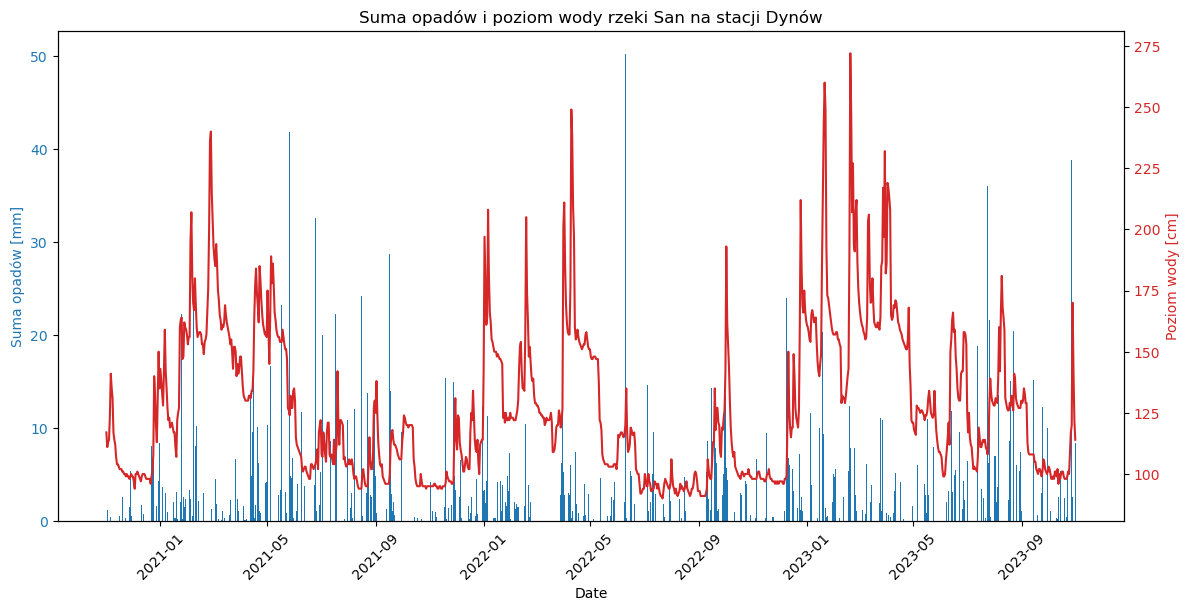

In [14]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Suma opadów [mm]', color=color)
# ax1.plot(dzien, -suma_opadow_pszcz, color=color)  # Inverse plot for rainfall
ax1.bar(dzien_san, suma_opadow_san, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# #ustawienie osi X
# ax1.xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Show every 7 days
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as YYYY-MM-DD
plt.xticks(rotation=45)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Poziom wody [cm]', color=color)
ax2.plot(dzien_san, poziom_wody_san, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure no overlap of y-axis labels
plt.title('Suma opadów i poziom wody rzeki San na stacji Dynów')
plt.show()

Wykres za ostatnie 100 dni

In [15]:
data_san_100 = data_san.sort_values(by=['Data'])[-100:]
dzien_san_100 = data_san_100['Data']
suma_opadow_san_100 = data_san_100['Suma dobowa opadów nowa [mm]']
poziom_wody_san_100 = data_san_100['Stan wody [cm]']
przeplyw_san_100 = data_san_100['Przepływ [m^3/s]']
temp_sr_san_100 = data_san_100['Średnia temperatura dobowa [°C]']
pokr_sn_san_100 = data_san_100['Wysokość pokrywy śnieżnej [cm]']
temp_min_grunt_san_100 = data_san_100['Temperatura minimalna przy gruncie [°C]']

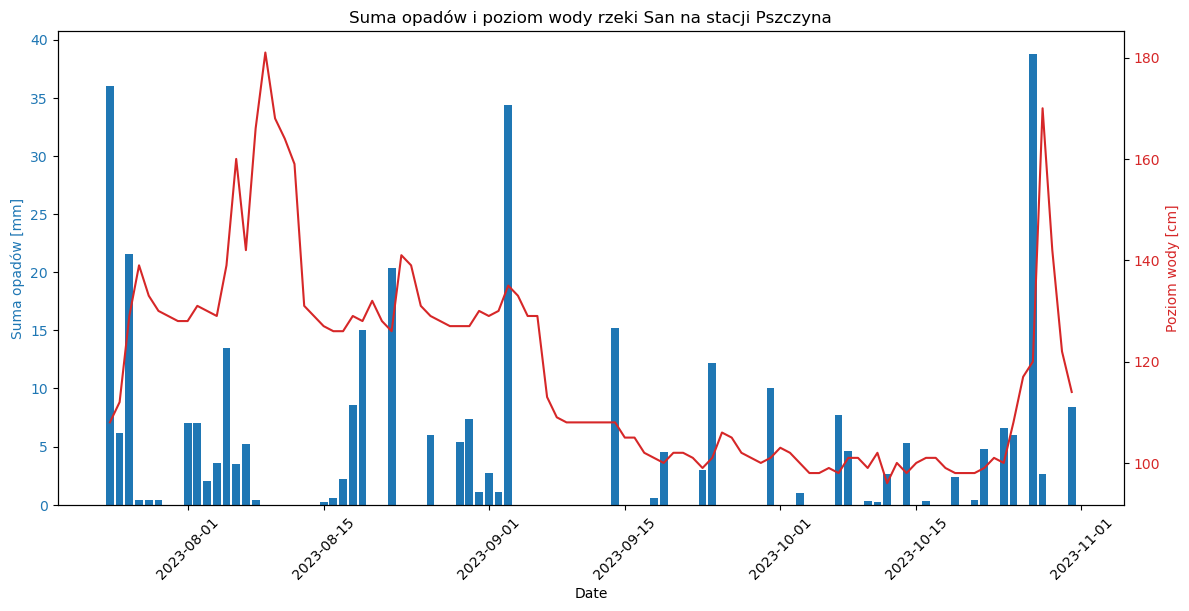

In [16]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Suma opadów [mm]', color=color)
# ax1.plot(dzien, -suma_opadow_pszcz, color=color)  # Inverse plot for rainfall
ax1.bar(dzien_san_100, suma_opadow_san_100, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# #ustawienie osi X
# ax1.xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Show every 7 days
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as YYYY-MM-DD
plt.xticks(rotation=45)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Poziom wody [cm]', color=color)
ax2.plot(dzien_san_100, poziom_wody_san_100, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure no overlap of y-axis labels
plt.title('Suma opadów i poziom wody rzeki San na stacji Pszczyna')
plt.show()

Wizualizacja train/test/valid z datami

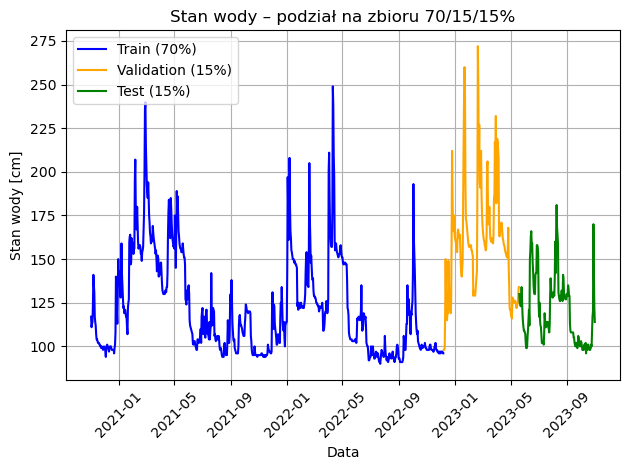

In [17]:
total_samples_san = len(data_san)
train_end_san = int(total_samples_san * 0.7)
validation_end_san = int(total_samples_san * 0.85)

train_san = data_san[:train_end_san]
validation_san = data_san[train_end_san:validation_end_san]
test_san = data_san[validation_end_san:]

plt.plot(train_san['Data'], train_san['Stan wody [cm]'],
         color='blue', label='Train (70%)')

# Validation
plt.plot(validation_san['Data'], validation_san['Stan wody [cm]'],
         color='orange', label='Validation (15%)')

# Test
plt.plot(test_san['Data'], test_san['Stan wody [cm]'],
         color='green', label='Test (15%)')

# Opisy osi
plt.xlabel('Data')
plt.ylabel('Stan wody [cm]')
plt.title('Stan wody – podział na zbioru 70/15/15%')

plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Usunięcie niepotrzebnych kolumn (wartosci nienumeryczne)

In [18]:
# data_ina = data_ina.drop(columns=['Data', 'Rodzaj opadu [S/W/]', 'Nazwa rzeki/jeziora', 'Nazwa stacji',\
#                                   'Temperatura wody [st. C]'])

data_san = data_san.drop(columns=['Data', 'Rodzaj opadu [S/W/]', 'Nazwa rzeki/jeziora', 'Nazwa stacji', \
                                  'Temperatura wody [st. C]', 'opad_no_precip'])


Podział zbioru

Podział na train, valid, test w proporcji 70/15/15

In [19]:
total_samples_san = len(data_san)
train_end_san = int(total_samples_san * 0.7)
validation_end_san = int(total_samples_san * 0.85)

train_san = data_san[:train_end_san]
validation_san = data_san[train_end_san:validation_end_san]
test_san = data_san[validation_end_san:]

In [20]:
print(len(train_san), len(validation_san), len(test_san))

766 164 165


### Metoda naiwna na zbiorze walidacyjnym (porównianie z procesem trenowania) i testowym (porówanie ostatecznego wyniku)

In [21]:
y_validation = validation_san.iloc[0]
y_test = test_san.iloc[0]

In [22]:
#na całości, kod z DL Chollet strona 222
def evaluate_naive_method_valid():
    batch_maes = []
    for i, step in enumerate(range(len(y_validation)-1)):
        preds, targets = y_validation[i], y_validation[i+1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    return np.mean(batch_maes)
    
print(evaluate_naive_method_valid())
#gdyby patrzeć tylko na dzień poprzedni o ile średnio taki wynik by się mylił (uwaga! miara mae taka jak w modelu!)

14.222222222222221


In [23]:
def evaluate_naive_method_test():
    batch_maes = []
    for i, step in enumerate(range(len(y_test)-1)):
        preds, targets = y_test[i], y_test[i+1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    return np.mean(batch_maes)
    
print(evaluate_naive_method_test())

24.444444444444443


#### Utworzenie sekwencji, aby można było predykować na szeregach czasowych 

In [24]:
def create_sequences(input_data, n_steps, n_ahead=1):
    X, y = [], []
    for i in range(len(input_data) - n_steps - n_ahead + 1):
        #indeks końca sekwencji
        end_ix = i + n_steps
        #Tworzenie sekwencji
        seq_x = input_data[i:end_ix, :]  # cechy i poziom wod w sekwencji wybranej dlugosci
        seq_y = input_data[end_ix+n_ahead-1, 0]  # poziom wód nastepnego dnia (lub nastepnego n_ahead dni dalej) po zakresie w wektorze cech
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

Wybór sekwencji

In [25]:
train_san

,Stan wody [cm],Maksymalna temperatura dobowa [°C],Minimalna temperatura dobowa [°C],Średnia temperatura dobowa [°C],Temperatura minimalna przy gruncie [°C],Suma dobowa opadów nowa [mm],Wysokość pokrywy śnieżnej [cm],Przepływ [m^3/s],opad_S,opad_W
1278,117,12.3,1.8,4.6,0.6,0.0,0,27.1,0,0
1279,111,11.1,0.8,7.1,0.0,1.2,0,21.3,0,1
1280,113,13.9,8.4,10.7,6.7,2.0,0,23.1,0,1
1281,114,15.2,9.1,11.3,9.0,6.4,0,24.5,0,1
1282,124,9.3,2.4,5.2,0.8,0.0,0,34.7,0,0
...,...,...,...,...,...,...,...,...,...,...
2039,97,0.2,-2.2,-1.0,-1.8,0.0,0,12.7,0,1
2040,97,4.3,-0.4,1.3,-0.7,0.0,0,12.5,0,0
2041,97,1.4,-0.1,0.4,0.1,0.0,0,12.3,0,0
2042,96,7.5,-0.1,2.2,-0.2,0.0,0,12.1,0,0


In [26]:
#uwaga zmiana typu danych!!
train_san = train_san.to_numpy()
validation_san = validation_san.to_numpy()
test_san = test_san.to_numpy()

In [27]:
n_steps = 1 #długość sekwencji

X_train, y_train = create_sequences(train_san, n_steps=n_steps, n_ahead=1)
X_validation, y_validation = create_sequences(validation_san, n_steps=n_steps, n_ahead=1)
X_test, y_test = create_sequences(test_san, n_steps=n_steps, n_ahead=1)

In [28]:
# y_train

Normalizacja zbioru treningowego

In [29]:
X_train.shape #drugi wymiar to n_steps

(765, 1, 10)

In [30]:
# n_train, steps, features = X_train.shape
# print(features)
# print(X_train.reshape(-1, features).shape)
# X_train.reshape(-1, features)

In [31]:
from sklearn.preprocessing import StandardScaler

#Zakładamy, że dane mają kształt: (próbki, kroki_czasowe, cechy)
n_train, steps, features = X_train.shape
n_val = X_validation.shape[0]
n_test = X_test.shape[0]

# Przekształcenie do 2D (scalanie kroków czasowych i próbek)
X_train_2d = X_train.reshape(-1, features)
X_val_2d = X_validation.reshape(-1, features)
X_test_2d = X_test.reshape(-1, features)

#Skalowanie
scaler = StandardScaler()
# StandardScaler oblicza średnią i odchylenie tylko z danych treningowych (fit_transform)
X_train_scaled = scaler.fit_transform(X_train_2d) 
#Potem tę samą skalę stosujemy do walidacji i testu (transform) (ochrona przed data_leakage)
X_val_scaled = scaler.transform(X_val_2d)
X_test_scaled = scaler.transform(X_test_2d)

# Przywrócenie oryginalnych kształtów
X_train = X_train_scaled.reshape(n_train, steps, features)
X_validation = X_val_scaled.reshape(n_val, steps, features)
X_test = X_test_scaled.reshape(n_test, steps, features)

In [32]:
X_train.shape

(765, 1, 10)

In [33]:
# mean_train_san = train_san.mean(axis=0)
# train_san -= mean_train_san
# std_san = train_san.std(axis=0)
# train_san /= std_san

In [34]:
#sprawdzenie zmienności zmiennej celu
print(y_train.min(), y_train.max())
print(np.mean(y_train), np.std(y_train))
#zmienność nei jest zbyt duża, dlatego nie skaluję na razie

90.0 249.0
121.80915032679738 28.0852608507707


In [35]:
# #do ewentulanego przetestowania czy poprawi wyniki
# from sklearn.preprocessing import StandardScaler

# y_scaler = StandardScaler()
# y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
# y_val_scaled = y_scaler.transform(y_validation.reshape(-1, 1))
# y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))


Punkt odniesienia (sprawdzenie y_train_san, jaki będzie błąd, gdy przyjmiemy, że poziom jutro będzie taki sam jak dziś)

miara błędu MAE

In [ ]:
# np.mean(np.abs(y_validation[-2]-y_validation[-1]))

In [ ]:
#czyli na danych nienormalizowanych 
# 0.44248616167015586 * np.std(validation_san[:, 1]) #musi być san bo sprawdam std przed walidacją
# 3.8cm

In [ ]:
# validation_san[:, 1]

Płaska sieć z jedną gęstą warstwą (str 494 ML)

In [ ]:
X_train.shape[-1]

In [ ]:
# from keras.models import Sequential
# from keras import layers
# from keras.layers import Flatten, Dense
import keras

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[n_steps, X_train.shape[-1]]), #input_shape = (timesteps, features)
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_validation, y_validation)
)

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Training History')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [ ]:
min(val_loss)

Prosty model rekurencyjny

In [ ]:
X_train.shape

In [ ]:
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# import keras

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, X_train.shape[2]]) #tutaj daję wartość none, żeby mogła wykryć zalezności czasowe
])

model.compile(optimizer='adam', loss='mae')

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [ ]:
min(val_loss) #źle to wygląda

Prosty model LSTM

In [ ]:
import keras
model = keras.models.Sequential([
    keras.layers.LSTM(64, activation='relu', input_shape=(n_steps, X_train.shape[2])),  # '2' represents the number of features in each time step
#     keras.layers.BatchNormalization(), nie poprawiła
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100, #widać, że więcej warstw moze pomóc
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [ ]:
min(val_loss) # o wiele lepiej, ale gorzej niż wartość bazowa

Model ze stosem warstw rekurencyjnych

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(64, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(32, activation='relu', return_sequences=True),
    keras.layers.LSTM(8, activation='relu', return_sequences=True),
    keras.layers.LSTM(16, activation='relu'),
#     keras.layers.BatchNormalization(), pogorszyła
#     keras.layers.LayerNormalization(), jeszcze gorzej
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [ ]:
min(val_loss)

Lstm ze stosem warstw z mniejszą liczbą neuronów w każdej

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(8, activation='relu'),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [ ]:
min(val_loss)

Lstm ze stosem większej liczby warstw

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(64, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(32, activation='relu', return_sequences=True),
    keras.layers.LSTM(16, activation='relu', return_sequences=True),
    keras.layers.LSTM(8, activation='relu'),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae')

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [ ]:
min(val_loss) 

Model lstm jak w ML STR  503 (modyfikacja zmiana f. aktywacji)

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(32,activation='relu', input_shape=(n_steps, X_train.shape[2]), return_sequences=True),
    keras.layers.LSTM(20,activation='relu' ),  # return_sequences=False (domyślnie)
    keras.layers.Dense(1) # keras.layers.TimeDistributed(keras.layers.Dense(1)) dawał by y_predict jako (batch_size, n_steps, 1)
])


model.compile(optimizer='adam', loss='mae')

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [ ]:
min(val_loss)

### Budowa ogólnego modelu na podstawie powyższych testów oraz optymalizacja jego hiperparametrów

#### model nr 1

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError

# Budowanie modelu z przestrzenią hiperparametrów
def build_model_1(hp):
    model = Sequential()
    
    # Liczba neuronów LSTM
    model.add(LSTM(
        units=hp.Int('units_lstm', min_value=8, max_value=64, step=8),
        activation='relu',
        input_shape=(n_steps, X_train.shape[2])
    ))
    
    # Gęsta warstwa
    model.add(Dense(
        units=hp.Int('units_dense', min_value=1, max_value=8, step=4),
        activation='relu'
    ))

    # Wyjście
    model.add(Dense(1))

    # Optymalizator (tu: learning rate jako hiperparametr)
    model.compile(
        optimizer=Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss=MeanAbsoluteError()
    )
    
    return model

In [ ]:
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model_1,
    objective='val_loss',
    max_trials=10,  # liczba różnych konfiguracji do przetestowania
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning',
    overwrite=True  # <<< TO ZRESETUJE tuner
)

tuner.search(X_train, y_train, 
             epochs=20, 
             validation_data=(X_validation, y_validation),
             callbacks=[])

# Wyświetlenie najlepszych hiperparametrów
best_hps = tuner.get_best_hyperparameters(1)[0]
print(f"Najlepsze hiperparametry: LSTM: {best_hps.get('units_lstm')}, Dense: {best_hps.get('units_dense')}, LR: {best_hps.get('learning_rate')}")

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(56, activation='relu', input_shape=(n_steps, X_train.shape[2])),  # '2' represents the number of features in each time step
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.007554544167531015)
model.compile(optimizer=optimizer, loss='mae')

#########

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

#### model nr 2

In [ ]:
# Budowanie modelu z przestrzenią hiperparametrów
def build_model_2(hp):
    model = Sequential()
    
    # Liczba neuronów LSTM
    model.add(LSTM(
        units=hp.Int('units_lstm1', min_value=8, max_value=64, step=8),
        activation='relu',
        return_sequences = True,
        input_shape=(n_steps, X_train.shape[2])
    ))
    
    model.add(LSTM(
        units=hp.Int('units_lstm2', min_value=8, max_value=32, step=4),
        activation='relu',
        return_sequences = True
    ))
    
    model.add(LSTM(
        units=hp.Int('units_lstm3', min_value=4, max_value=16, step=2),
        activation='relu',
        return_sequences = True
    ))
    
    model.add(LSTM(
        units=hp.Int('units_lstm4', min_value=4, max_value=16, step=2),
        activation='relu'
    ))
    
    # Gęsta warstwa
    model.add(Dense(
        units=hp.Int('units_dense', min_value=1, max_value=8, step=2),
        activation='relu'
    ))

    # Wyjście
    model.add(Dense(1))

    # Optymalizator (tu: learning rate jako hiperparametr)
    model.compile(
        optimizer=Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss=MeanAbsoluteError()
    )
    
    return model

In [ ]:
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model_2,
    objective='val_loss',
    max_trials=10,  # liczba różnych konfiguracji do przetestowania
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning',
    overwrite=True  # <<< TO ZRESETUJE tuner
)

tuner.search(X_train, y_train, 
             epochs=20, 
             validation_data=(X_validation, y_validation),
             callbacks=[])

# Wyświetlenie najlepszych hiperparametrów
best_hps = tuner.get_best_hyperparameters(1)[0]
print(f"Najlepsze hiperparametry: LSTM: {best_hps.get('units_lstm1')}, {best_hps.get('units_lstm2')},\
{best_hps.get('units_lstm3')},{best_hps.get('units_lstm4')}, Dense: {best_hps.get('units_dense')},\
LR: {best_hps.get('learning_rate')}")


In [ ]:
model = keras.models.Sequential([
   keras.layers.LSTM(40, activation='relu', input_shape=(n_steps, X_train.shape[2]),\
                      return_sequences=True),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(12, activation='relu', return_sequences=True),
    keras.layers.LSTM(8, activation='relu', return_sequences=True),
    keras.layers.LSTM(16, activation='relu'),
    keras.layers.Dense(3, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.0028902723757567583)
model.compile(optimizer=optimizer, loss='mae')

#########

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

#### Model 3

In [ ]:
# Budowanie modelu z przestrzenią hiperparametrów
def build_model_3(hp):
    model = Sequential()
    
    # Liczba neuronów LSTM
    model.add(LSTM(
        units=hp.Int('units_lstm1', min_value=8, max_value=64, step=8),
        activation='relu',
        return_sequences = True,
        input_shape=(n_steps, X_train.shape[2])
    ))
    
    model.add(LSTM(
        units=hp.Int('units_lstm2', min_value=8, max_value=32, step=2),
        activation='relu'
    ))

    # Wyjście
    model.add(Dense(1))

    # Optymalizator (tu: learning rate jako hiperparametr)
    model.compile(
        optimizer=Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss=MeanAbsoluteError()
    )
    
    return model

In [ ]:
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model_3,
    objective='val_loss',
    max_trials=10,  # liczba różnych konfiguracji do przetestowania
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning',
    overwrite=True  # <<< TO ZRESETUJE tuner
)

tuner.search(X_train, y_train, 
             epochs=20, 
             validation_data=(X_validation, y_validation),
             callbacks=[])

# Wyświetlenie najlepszych hiperparametrów
best_hps = tuner.get_best_hyperparameters(1)[0]
print(f"Najlepsze hiperparametry: LSTM: {best_hps.get('units_lstm1')}, {best_hps.get('units_lstm2')},\
LR: {best_hps.get('learning_rate')}")


In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(64,activation='relu', input_shape=(n_steps, X_train.shape[2]), return_sequences=True),
    keras.layers.LSTM(12,activation='relu' ),  # return_sequences=False (domyślnie)
    keras.layers.Dense(1) 
])

optimizer = keras.optimizers.Adam(learning_rate=0.006851781534735413)
model.compile(optimizer=optimizer, loss='mae')

#########

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

### Najlepszy model z regularyzacją

#### early stopping

In [ ]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(n_steps, X_train.shape[2])),
       keras.layers.LSTM(40, activation='relu', return_sequences=True),  # warstwa zwraca pełne sekencje wyjściowe (tensory trójwymiarowe)
    keras.layers.LSTM(12, activation='relu', return_sequences=True),
    keras.layers.LSTM(8, activation='relu', return_sequences=True),
    keras.layers.LSTM(16, activation='relu'),
    keras.layers.Dense(3, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.0028902723757567583)
model.compile(optimizer=optimizer, loss='mae')


In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Tworzenie callbacku EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # monitorowanie straty walidacyjnej
    patience=20,              #liczba epok bez poprawy, po których zatrzyma trenowanie
    restore_best_weights=True  # przywróć najlepsze wagi po zatrzymaniu
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping]
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

#### l1

In [ ]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.regularizers import l1
from keras.optimizers import Adam

# Ustal poziom regularyzacji L1
l1_reg = 1e-4  # lambda karanie wag

model = Sequential([
    Input(shape=(n_steps, X_train.shape[2])),
    LSTM(40, activation='relu',return_sequences=True,kernel_regularizer=l1(l1_reg)),
    LSTM(12, activation='relu',return_sequences=True,kernel_regularizer=l1(l1_reg)),
    LSTM(8,activation='relu',return_sequences=True, kernel_regularizer=l1(l1_reg)),
    LSTM(16, activation='relu',kernel_regularizer=l1(l1_reg)),
    Dense(3, activation='relu',kernel_regularizer=l1(l1_reg)),
    Dense(1)
])

optimizer = Adam(learning_rate=0.0028902723757567583)
model.compile(optimizer=optimizer, loss='mae')


#########

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

#### l2

In [ ]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.regularizers import l1, l2
from keras.optimizers import Adam

# Ustal poziom regularyzacji L1
l2_reg = 1e-4  # lambda karanie wag

model = Sequential([
    Input(shape=(n_steps, X_train.shape[2])),
    LSTM(40, activation='relu',return_sequences=True,kernel_regularizer=l2(l2_reg)),
    LSTM(12, activation='relu',return_sequences=True,kernel_regularizer=l2(l2_reg)),
    LSTM(8,activation='relu',return_sequences=True, kernel_regularizer=l2(l2_reg)),
    LSTM(16, activation='relu',kernel_regularizer=l2(l2_reg)),
    Dense(3, activation='relu',kernel_regularizer=l2(l2_reg)),
    Dense(1)
])

optimizer = Adam(learning_rate=0.0028902723757567583)
model.compile(optimizer=optimizer, loss='mae')


#########

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

l1_l2

In [ ]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.regularizers import l1_l2
from keras.optimizers import Adam

l1_reg = 1e-3  # lambda karanie wag
l2_reg = 1e-4  # lambda karanie wag

model = Sequential([
    Input(shape=(n_steps, X_train.shape[2])),
    LSTM(40, activation='relu',return_sequences=True,kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
    LSTM(12, activation='relu',return_sequences=True,kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
    LSTM(8,activation='relu',return_sequences=True, kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
    LSTM(16, activation='relu',kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
    Dense(3, activation='relu',kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
    Dense(1)
])

optimizer = Adam(learning_rate=0.0028902723757567583)
model.compile(optimizer=optimizer, loss='mae')


#########

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_validation, y_validation)
)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

####################
print(min(val_loss))

### l1 i earlystopping M1

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.regularizers import l1
from keras.optimizers import Adam

# Ustal poziom regularyzacji L1
l1_reg = 1e-5  # lambda karanie wag

model = Sequential([
    Input(shape=(n_steps, X_train.shape[2])),
    LSTM(40, activation='relu',return_sequences=True,kernel_regularizer=l1(l1_reg)),
    LSTM(12, activation='relu',return_sequences=True,kernel_regularizer=l1(l1_reg)),
    LSTM(8,activation='relu',return_sequences=True, kernel_regularizer=l1(l1_reg)),
    LSTM(16, activation='relu',kernel_regularizer=l1(l1_reg)),
    Dense(3, activation='relu',kernel_regularizer=l1(l1_reg)),
    Dense(1)
])

optimizer = Adam(learning_rate=0.0028902723757567583)
model.compile(optimizer=optimizer, loss='mae')


In [37]:
from tensorflow.keras.callbacks import EarlyStopping

# Tworzenie callbacku EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # monitorowanie straty walidacyjnej
    patience=20,              #liczba epok bez poprawy, po których zatrzyma trenowanie
    restore_best_weights=True  # przywróć najlepsze wagi po zatrzymaniu
)

history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping]
)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - loss: 120.4626 - val_loss: 160.0238
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 121.5312 - val_loss: 157.4903
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 115.5816 - val_loss: 100.2889
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 72.6044 - val_loss: 77.2353
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 50.7300 - val_loss: 59.5672
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 34.2017 - val_loss: 43.0295
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.1069 - val_loss: 24.3102
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.8426 - val_loss: 20.3633
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.8257 - val_loss: 16.6154
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.3749 - val_loss: 18.5988
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.8834 - val_loss: 12.2423
Epoch 12/200
24/24 ━━━━━━━━━━━━━━

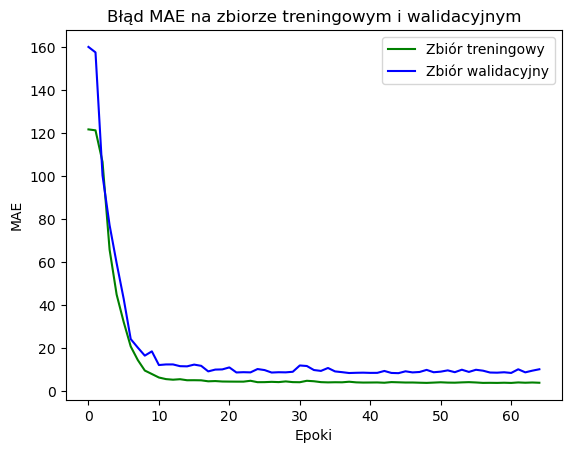

8.470094680786133


In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'g', label='Zbiór treningowy')
plt.plot(epochs, val_loss, 'b', label='Zbiór walidacyjny')
plt.title('Błąd MAE na zbiorze treningowym i walidacyjnym')
plt.legend()
plt.xlabel('Epoki')
plt.ylabel('MAE')

plt.show()

####################
print(min(val_loss))

### l1 i earlystopping M2

In [73]:
import keras
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from keras.regularizers import l1
from keras.optimizers import Adam

# Ustal poziom regularyzacji L1
l1_reg = 1e-5  # lambda karanie wag

model = Sequential([
    Input(shape=(n_steps, X_train.shape[2])),
    LSTM(32, activation='relu',return_sequences=True,kernel_regularizer=l1(l1_reg)),
    LSTM(20, activation='relu',kernel_regularizer=l1(l1_reg)),
    Dense(1)
])


model.compile(optimizer='adam', loss='mae') #domyslne lr 0.001


In [74]:
from tensorflow.keras.callbacks import EarlyStopping

# Tworzenie callbacku EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # monitorowanie straty walidacyjnej
    patience=20,              #liczba epok bez poprawy, po których zatrzyma trenowanie
    restore_best_weights=True  # przywróć najlepsze wagi po zatrzymaniu
)

history = model.fit(
    X_train, y_train,
    epochs=300,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping]
)

Epoch 1/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 120.4738 - val_loss: 160.1570
Epoch 2/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 122.6237 - val_loss: 159.9357
Epoch 3/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 121.4387 - val_loss: 159.1739
Epoch 4/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 120.8019 - val_loss: 156.1992
Epoch 5/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 116.8066 - val_loss: 148.3771
Epoch 6/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 108.0259 - val_loss: 134.3276
Epoch 7/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 96.7474 - val_loss: 117.3429
Epoch 8/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.9207 - val_loss: 102.2510
Epoch 9/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.9334 - val_loss: 90.8785
Epoch 10/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 58.7008 - val_loss: 83.5381
Epoch 11/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.8998 - val_loss: 78.4702
Epoch 12/300
24/24 ━━━━━━

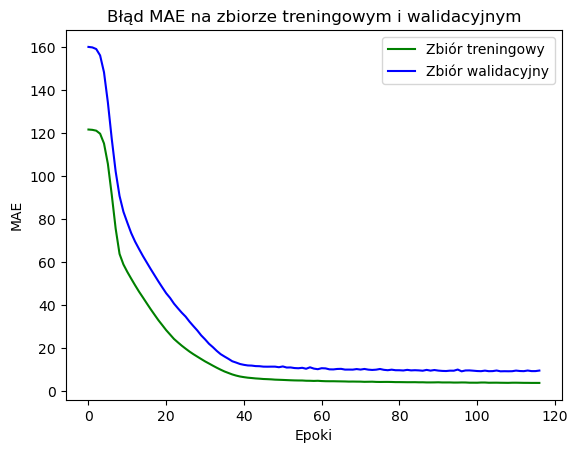

9.358222961425781


In [75]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'g', label='Zbiór treningowy')
plt.plot(epochs, val_loss, 'b', label='Zbiór walidacyjny')
plt.title('Błąd MAE na zbiorze treningowym i walidacyjnym')
plt.legend()
plt.xlabel('Epoki')
plt.ylabel('MAE')

plt.show()

####################
print(min(val_loss))

### Actual vs predicted

Scatter plots

In [39]:
test_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step


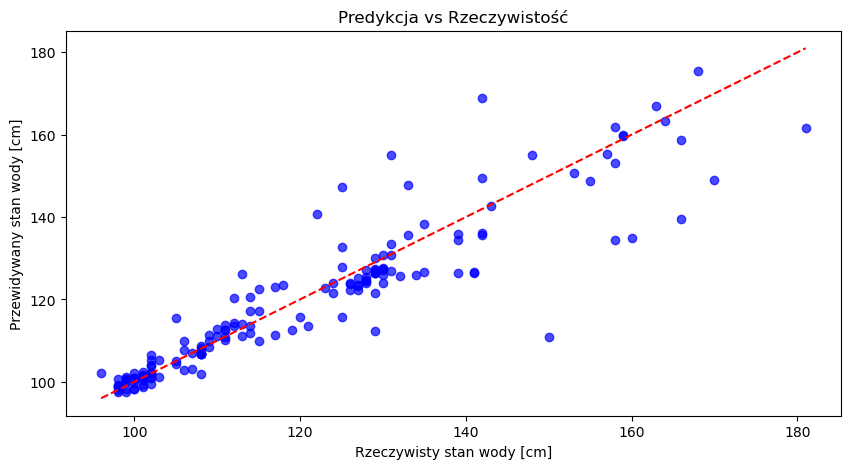

In [40]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, test_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="dashed")  # Idealne dopasowanie
plt.xlabel("Rzeczywisty stan wody [cm]")
plt.ylabel("Przewidywany stan wody [cm]")
plt.title("Predykcja vs Rzeczywistość")
plt.show()

Dopasowanie

In [41]:
def plot_predictions_with_error(true_data, predicted_data, title):
    plt.figure(figsize=(10, 12))
    
    # Flatten arrays to ensure compatibility with matplotlib
    true_data_flatten = true_data.flatten()
    predicted_data_flatten = predicted_data.flatten()
    
    # Calculate error
    error = true_data_flatten - predicted_data_flatten
    positive_error_std = np.std(error[error >= 0])
    negative_error_std = np.std(error[error < 0])
    mae = sum(np.abs(error))/len(error)
    print(f"Błąd MAE {mae}")
    # Plot true data vs. predicted data
    ax1 = plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
    ax1.plot(true_data_flatten, label='Prawdziwe dane')
    ax1.plot(predicted_data_flatten, label='Wartości przewidywane', alpha=0.7)
    ax1.set_title(title)
    ax1.set_ylabel('Stan wody [cm]')
    ax1.set_xlabel('Dni')
    #ustawienie stałej skali na osi Y, gdy używam oryginalnej skali danych, nie mieszczacej się w zakresie [0,1]
    if true_data[0] > 1:
        ax1 = plt.gca()
        ax1.set_ylim([50, 300])
    ax1.legend()

In [42]:
train_pred = model.predict(X_train)
validation_pred = model.predict(X_validation)
test_pred = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Training MAE
Błąd MAE 4.205991149104499
Validation MAE
Błąd MAE 8.462864273164902
Test MAE
Błąd MAE 4.461884847501429


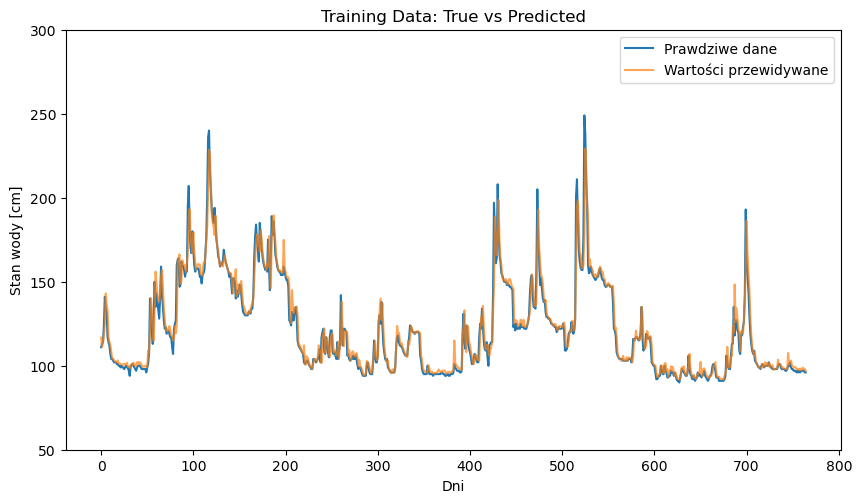

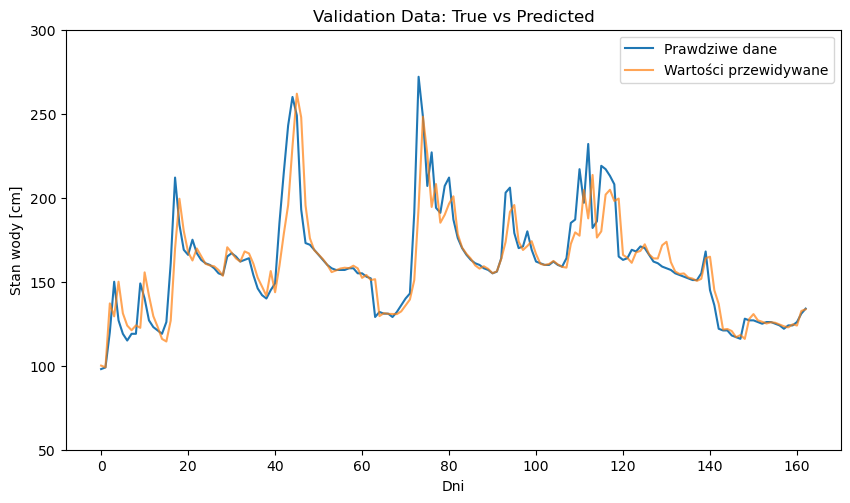

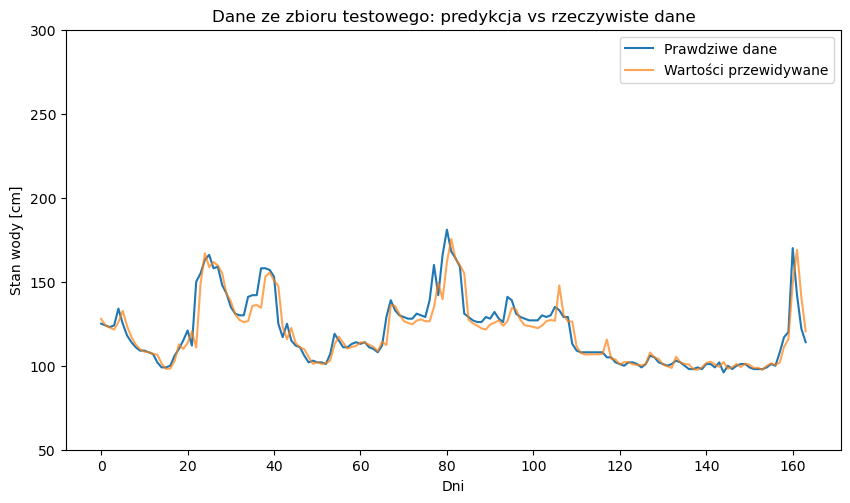

In [43]:
print("Training MAE")
plot_predictions_with_error(y_train, train_pred, 'Training Data: True vs Predicted')
print("Validation MAE")
plot_predictions_with_error(y_validation, validation_pred, 'Validation Data: True vs Predicted')
print("Test MAE")
plot_predictions_with_error(y_test, test_pred, 'Dane ze zbioru testowego: predykcja vs rzeczywiste dane')

Ocena wybranego modelu

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def smape(y_true, y_pred):
    """
    Symmetric Mean Absolute Percentage Error
    """
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0  # Unikamy dzielenia przez 0
    return 100 * np.mean(diff)

def evaluate_model(y_true, y_pred):
    # Upewnij się, że dane są spłaszczone
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    smape_score = smape(y_true, y_pred)

    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"sMAPE: {smape_score:.2f}%")


In [45]:
evaluate_model(y_test, test_pred)

RMSE: 7.6230
R²: 0.8440
sMAPE: 3.45%
